In [1]:
!pip install matplotlib seaborn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
traffic_data_path = 'traffic_result.csv'
traffic_data = pd.read_csv(traffic_data_path)
traffic_data.head()


,Day,detector_id,lane,speed,occupancy,volume
0,1,AID01101,Fast Lane,76,9,12
1,1,AID01102,Middle Lane,70,6,6
2,1,AID01102,Fast Lane,69,7,8
3,1,AID01102,Middle Lane,71,5,7
4,1,AID01102,Slow Lane,53,5,5


In [3]:
import calendar
from datetime import datetime

year = 2024
month = 2
num_days = calendar.monthrange(year, month)[1]
dates = pd.date_range(start=f"{year}-{month}-01", periods=num_days, freq='D')

day_to_date = {day: date for day, date in enumerate(dates, start=1)}

traffic_data['date'] = traffic_data['Day'].map(day_to_date)
traffic_data['day_of_week'] = traffic_data['date'].dt.dayofweek 
traffic_data['is_special_event'] = traffic_data['day_of_week'].isin([5, 6])

daily_traffic = traffic_data.groupby('date').agg({
    'speed': 'mean',
    'occupancy': 'mean',
    'volume': 'sum',
    'is_special_event': 'first' 
}).reset_index()

daily_traffic.head()


,date,speed,occupancy,volume,is_special_event
0,2024-02-01,58.306122,9.183673,712,False
1,2024-02-02,62.106383,7.978723,629,False
2,2024-02-03,68.652632,4.284211,489,True
3,2024-02-04,77.808511,4.457447,306,True
4,2024-02-05,60.314815,22.490741,839,False


In [4]:
import json

# Attempt to load the JSON file with the correct encoding to handle UTF-8 BOM
with open('tc.json', 'r', encoding='utf-8-sig') as file:
    holidays_data = json.load(file)

# Extract the public holidays events again
holiday_events = holidays_data['vcalendar'][0]['vevent']

# Filter for holidays in February 2024
feb_holidays = [
    datetime.strptime(event['dtstart'][0], '%Y%m%d').date() for event in holiday_events
    if datetime.strptime(event['dtstart'][0], '%Y%m%d').month == 2 and datetime.strptime(event['dtstart'][0], '%Y%m%d').year == 2024
]

# Show the extracted holidays
feb_holidays


[datetime.date(2024, 2, 10),
 datetime.date(2024, 2, 12),
 datetime.date(2024, 2, 13)]

In [5]:
# Mark public holidays as special event days in the traffic data
daily_traffic['is_public_holiday'] = daily_traffic['date'].isin(feb_holidays)

# Combine weekend and public holiday markers to define all special event days
daily_traffic['is_special_event'] = daily_traffic['is_special_event'] | daily_traffic['is_public_holiday']

# Display the updated daily traffic data
daily_traffic.head(15)  # Displaying the first 15 days to check some of the special event flags


,date,speed,occupancy,volume,is_special_event,is_public_holiday
0,2024-02-01,58.306122,9.183673,712,False,False
1,2024-02-02,62.106383,7.978723,629,False,False
2,2024-02-03,68.652632,4.284211,489,True,False
3,2024-02-04,77.808511,4.457447,306,True,False
4,2024-02-05,60.314815,22.490741,839,False,False
5,2024-02-06,66.158879,17.177570,871,False,False
6,2024-02-07,67.645455,15.836364,862,False,False
7,2024-02-08,62.872549,5.470588,619,False,False
8,2024-02-09,67.865169,4.696629,433,False,False
9,2024-02-10,67.961538,2.480769,126,True,True


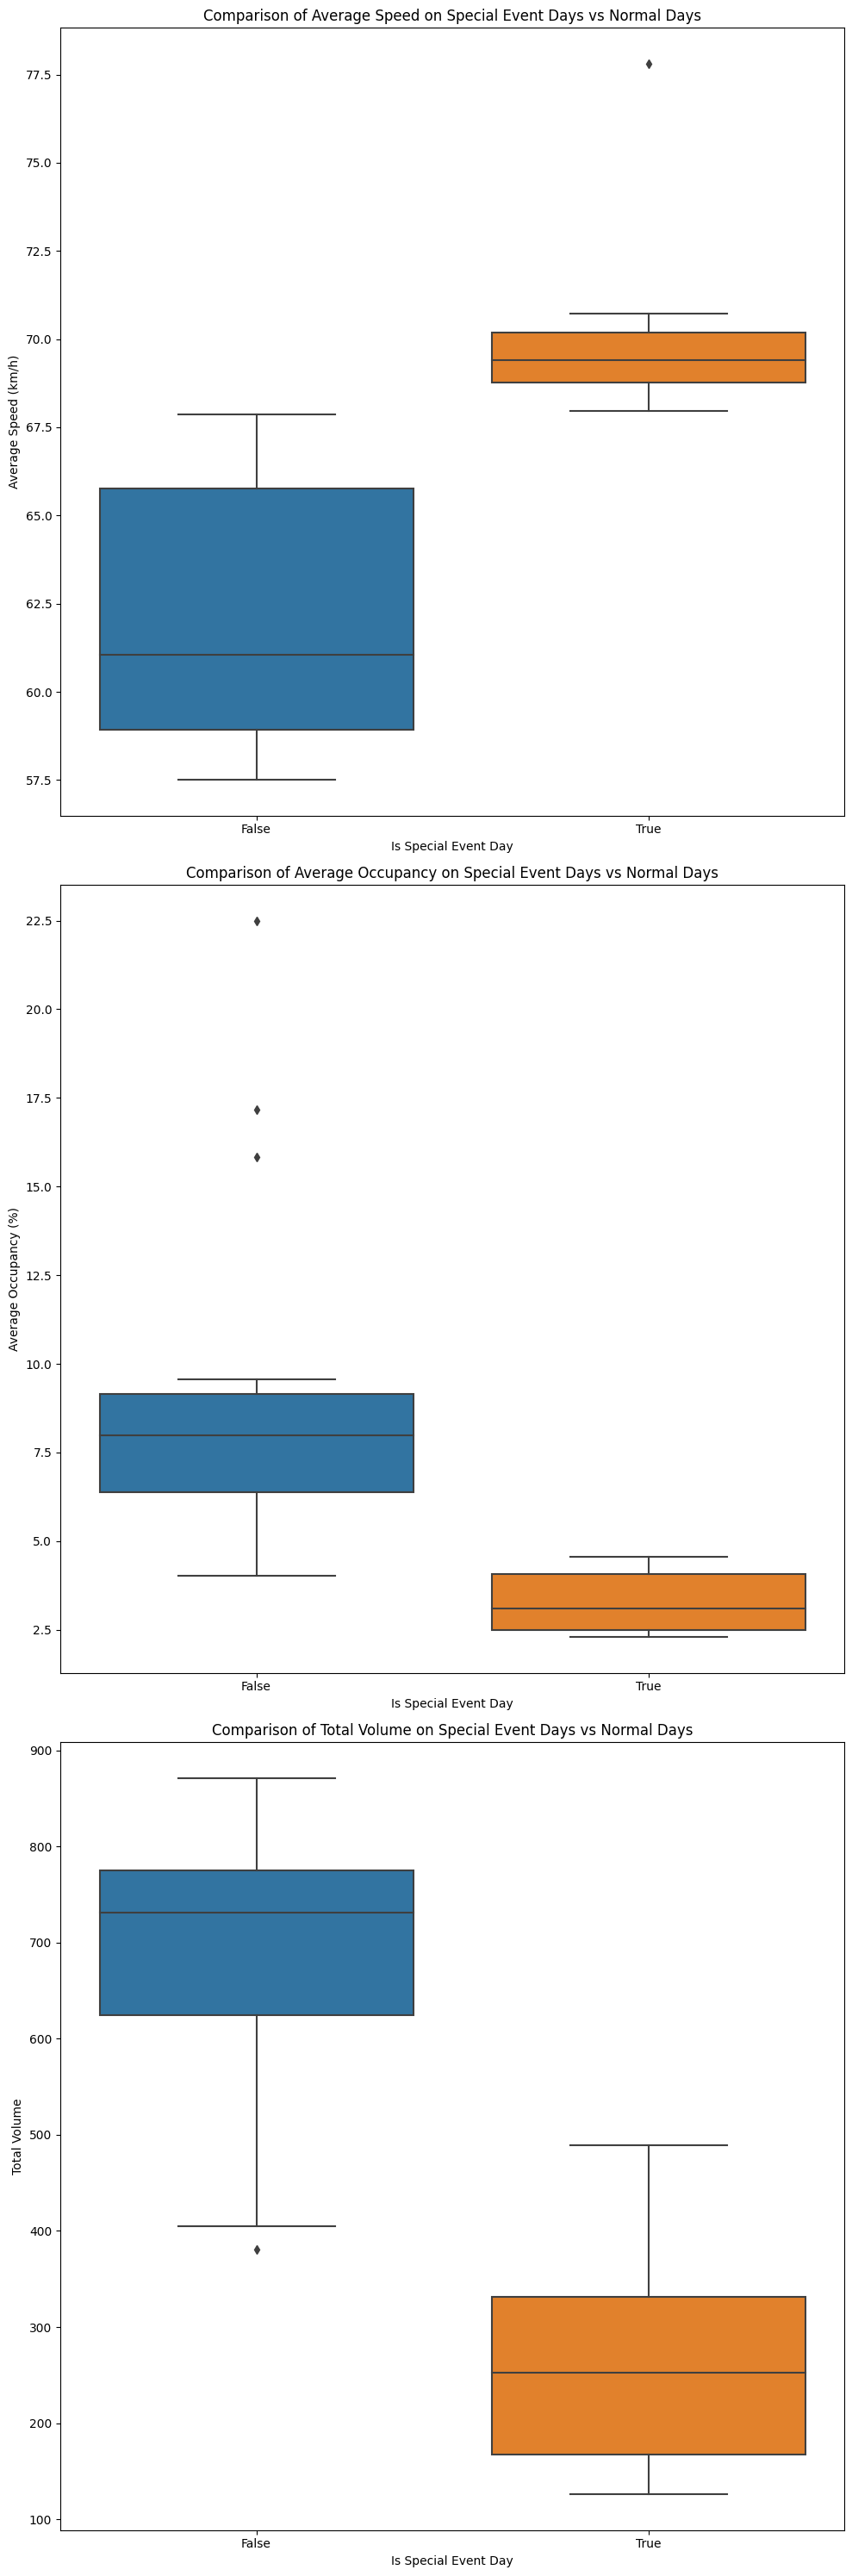

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization
plt.figure(figsize=(10, 30))

# Plot for Speed
plt.subplot(3, 1, 1)
sns.boxplot(x='is_special_event', y='speed', data=daily_traffic)
plt.title('Comparison of Average Speed on Special Event Days vs Normal Days')
plt.xlabel('Is Special Event Day')
plt.ylabel('Average Speed (km/h)')

# Plot for Occupancy
plt.subplot(3, 1, 2)
sns.boxplot(x='is_special_event', y='occupancy', data=daily_traffic)
plt.title('Comparison of Average Occupancy on Special Event Days vs Normal Days')
plt.xlabel('Is Special Event Day')
plt.ylabel('Average Occupancy (%)')

# Plot for Volume
plt.subplot(3, 1, 3)
sns.boxplot(x='is_special_event', y='volume', data=daily_traffic)
plt.title('Comparison of Total Volume on Special Event Days vs Normal Days')
plt.xlabel('Is Special Event Day')
plt.ylabel('Total Volume')

# Display the plots
plt.tight_layout()
plt.show()


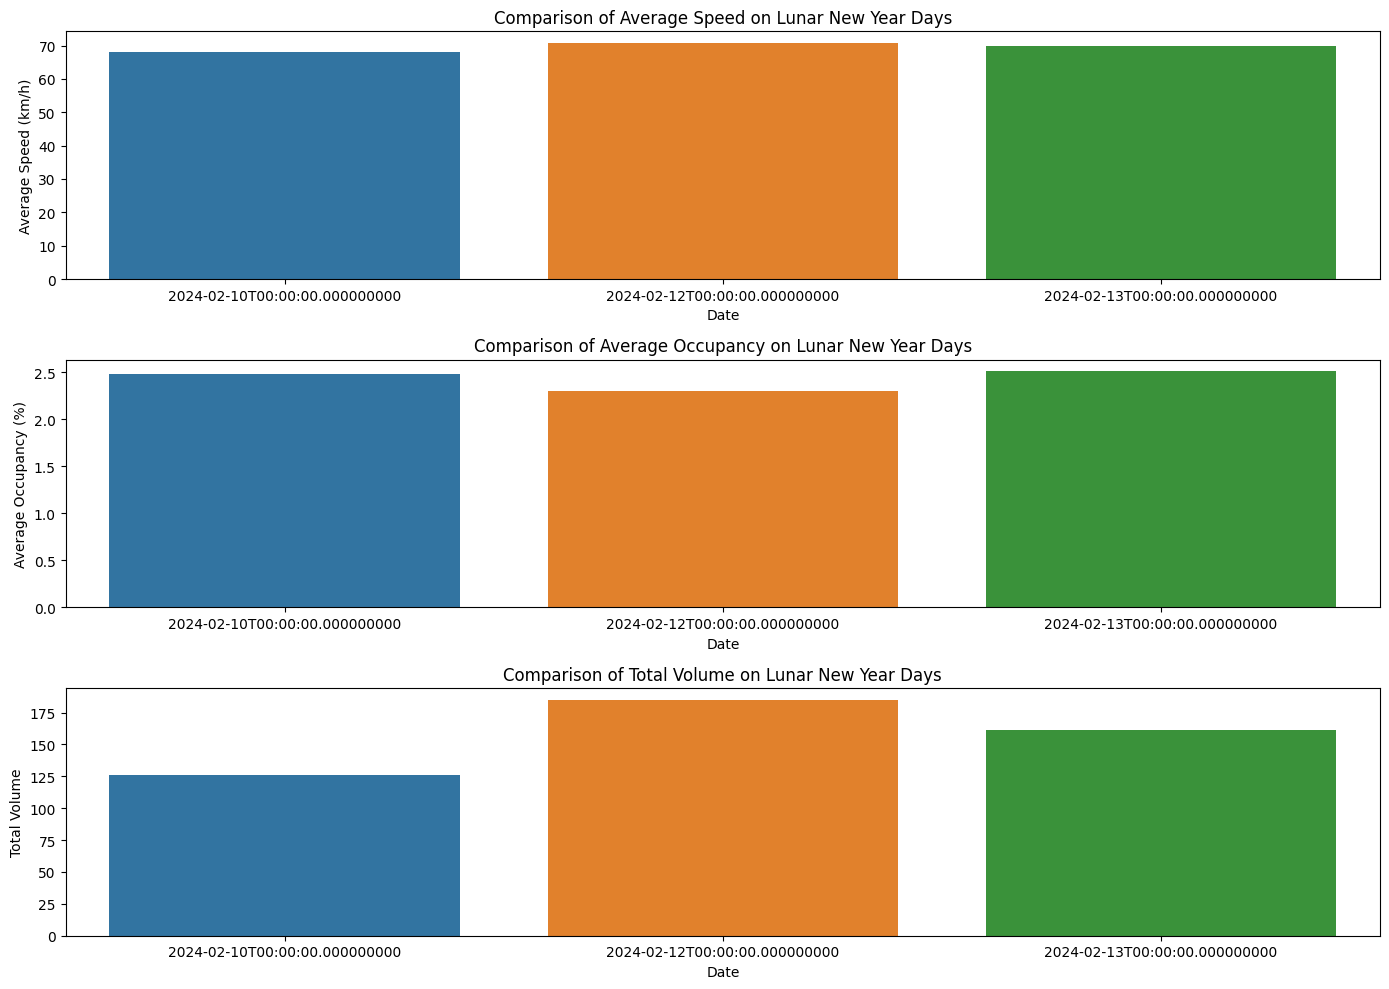

In [7]:
# Filter the daily traffic data for the specific public holidays around Lunar New Year
lunar_new_year_dates = ['2024-02-10', '2024-02-12', '2024-02-13']
lunar_new_year_traffic = daily_traffic[daily_traffic['date'].isin(lunar_new_year_dates)]

# Visualize the traffic metrics for these specific days
plt.figure(figsize=(14, 10))

# Plot for Speed on Lunar New Year Days
plt.subplot(3, 1, 1)
sns.barplot(x='date', y='speed', data=lunar_new_year_traffic)
plt.title('Comparison of Average Speed on Lunar New Year Days')
plt.xlabel('Date')
plt.ylabel('Average Speed (km/h)')

# Plot for Occupancy on Lunar New Year Days
plt.subplot(3, 1, 2)
sns.barplot(x='date', y='occupancy', data=lunar_new_year_traffic)
plt.title('Comparison of Average Occupancy on Lunar New Year Days')
plt.xlabel('Date')
plt.ylabel('Average Occupancy (%)')

# Plot for Volume on Lunar New Year Days
plt.subplot(3, 1, 3)
sns.barplot(x='date', y='volume', data=lunar_new_year_traffic)
plt.title('Comparison of Total Volume on Lunar New Year Days')
plt.xlabel('Date')
plt.ylabel('Total Volume')

# Display the plots
plt.tight_layout()
plt.show()


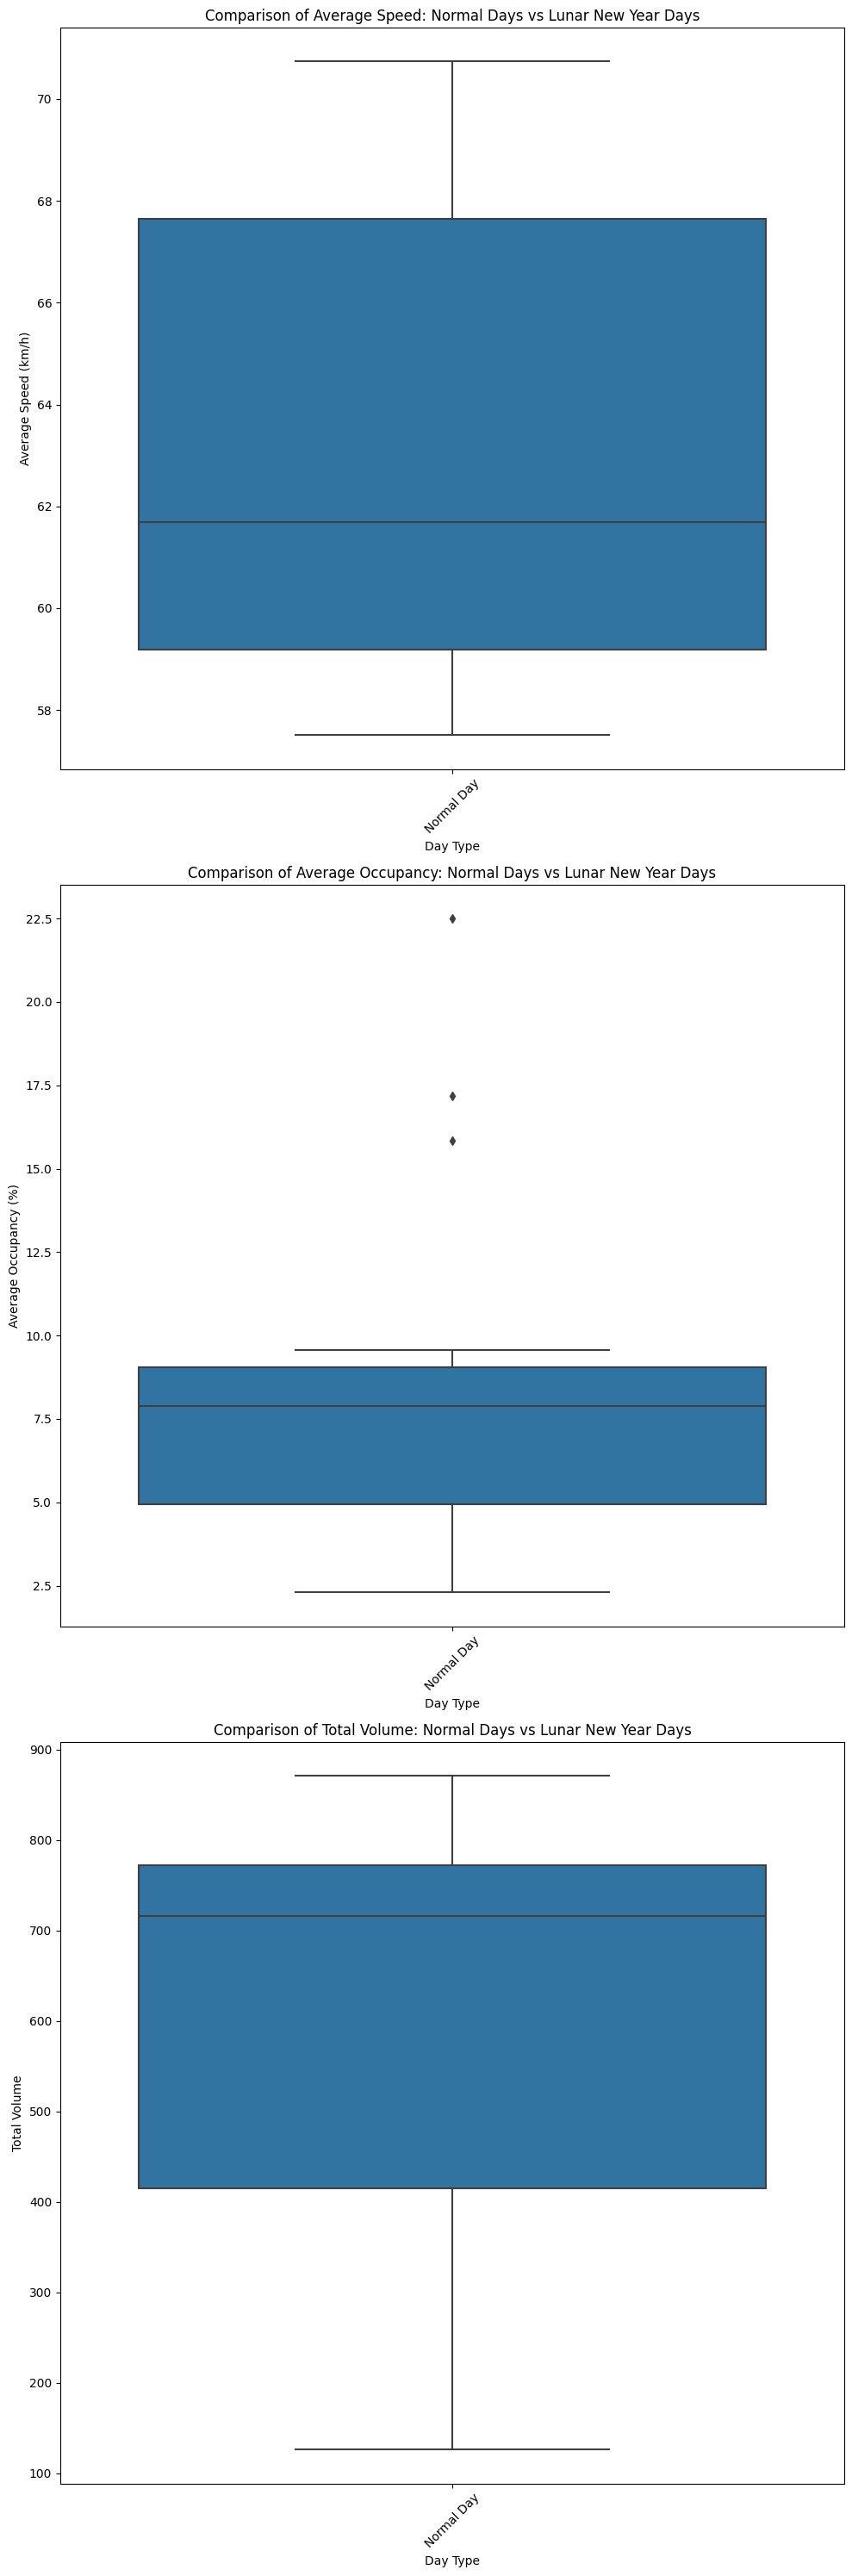

In [8]:
# Filter for normal days (not weekends or public holidays)
normal_days_traffic = daily_traffic[(~daily_traffic['is_special_event']) & (~daily_traffic['is_public_holiday'])]

# Combine normal days with Lunar New Year days for comparison
comparison_traffic = pd.concat([normal_days_traffic, lunar_new_year_traffic])

# Set a new column for better labeling in the plots
comparison_traffic['Day Type'] = comparison_traffic['date'].apply(
    lambda x: 'Normal Day' if x not in lunar_new_year_dates else f'Lunar New Year {x.strftime("%Y-%m-%d")}'
)

# Visualize the traffic metrics for normal days and specific Lunar New Year days
plt.figure(figsize=(10, 30))

# Plot for Speed Comparison
plt.subplot(3, 1, 1)
sns.boxplot(x='Day Type', y='speed', data=comparison_traffic)
plt.title('Comparison of Average Speed: Normal Days vs Lunar New Year Days')
plt.xticks(rotation=45)
plt.xlabel('Day Type')
plt.ylabel('Average Speed (km/h)')

# Plot for Occupancy Comparison
plt.subplot(3, 1, 2)
sns.boxplot(x='Day Type', y='occupancy', data=comparison_traffic)
plt.title('Comparison of Average Occupancy: Normal Days vs Lunar New Year Days')
plt.xticks(rotation=45)
plt.xlabel('Day Type')
plt.ylabel('Average Occupancy (%)')

# Plot for Volume Comparison
plt.subplot(3, 1, 3)
sns.boxplot(x='Day Type', y='volume', data=comparison_traffic)
plt.title('Comparison of Total Volume: Normal Days vs Lunar New Year Days')
plt.xticks(rotation=45)
plt.xlabel('Day Type')
plt.ylabel('Total Volume')

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
# Filter for normal days excluding the specific Lunar New Year dates
normal_days_exclusive = daily_traffic[
    (~daily_traffic['is_special_event']) &
    (~daily_traffic['date'].isin(lunar_new_year_dates))
]

# Combine exclusive normal days with Lunar New Year days for comparison
exclusive_comparison_traffic = pd.concat([normal_days_exclusive, lunar_new_year_traffic])

# Set a new column for better labeling in the plots
exclusive_comparison_traffic['Day Type'] = exclusive_comparison_traffic['date'].apply(
    lambda x: 'Normal Day' if x not in lunar_new_year_dates else f'Lunar New Year {x.strftime("%Y-%m-%d")}'
)

# Visualize the traffic metrics for exclusive normal days and specific Lunar New Year days
plt.figure(figsize=(10, 30))

# Plot for Speed Comparison
plt.subplot(3, 1, 1)
sns.boxplot(x='Day Type', y='speed', data=exclusive_comparison_traffic)
plt.title('Comparison of Average Speed: Exclusive Normal Days vs Lunar New Year Days')
plt.xticks(rotation=45)
plt.xlabel('Day Type')
plt.ylabel('Average Speed (km/h)')

# Plot for Occupancy Comparison
plt.subplot(3, 1, 2)
sns.boxplot(x='Day Type', y='occupancy', data=exclusive_comparison_traffic)
plt.title('Comparison of Average Occupancy: Exclusive Normal Days vs Lunar New Year Days')
plt.xticks(rotation=45)
plt.xlabel('Day Type')
plt.ylabel('Average Occupancy (%)')

# Plot for Volume Comparison
plt.subplot(3, 1, 3)
sns.boxplot(x='Day Type', y='volume', data=exclusive_comparison_traffic)
plt.title('Comparison of Total Volume: Exclusive Normal Days vs Lunar New Year Days')
plt.xticks(rotation=45)
plt.xlabel('Day Type')
plt.ylabel('Total Volume')

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
# Load the traffic data (replace 'path_to_file.csv' with the path to your data file)
traffic_data = pd.read_csv('traffic_result.csv')

# Aggregating data by 'Day' to calculate daily averages for speed, occupancy, and volume
daily_traffic_data = traffic_data.groupby('Day').agg({
    'speed': 'mean',
    'occupancy': 'mean',
    'volume': 'mean'
}).reset_index()

# Standardizing the data
scaler = StandardScaler()
scaled_traffic_data = scaler.fit_transform(daily_traffic_data[['speed', 'occupancy', 'volume']])

# Applying K-means clustering
# Determining the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    # Explicitly setting the value of n_init to 10 (current default) or any other appropriate number
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_traffic_data)
    inertia.append(kmeans.inertia_)


# Plotting the elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
# Applying K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_traffic_data)

# Adding cluster labels to the original daily traffic data
daily_traffic_data['Cluster'] = cluster_labels

# Analyzing the characteristics of each cluster by calculating mean values of the original metrics
cluster_characteristics = daily_traffic_data.groupby('Cluster').agg({
    'speed': 'mean',
    'occupancy': 'mean',
    'volume': 'mean'
}).reset_index()

cluster_characteristics


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the color palette
palette = sns.color_palette('hsv', 3)  # Defines a color palette with 3 distinct colors

# Plot 1: Speed vs Occupancy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='speed', y='occupancy', hue='Cluster', data=daily_traffic_data, palette=palette, alpha=0.6)
plt.title('Speed vs Occupancy')
plt.show()

# Plot 2: Speed vs Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='speed', y='volume', hue='Cluster', data=daily_traffic_data, palette=palette, alpha=0.6)
plt.title('Speed vs Volume')
plt.show()

# Plot 3: Occupancy vs Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='occupancy', y='volume', hue='Cluster', data=daily_traffic_data, palette=palette, alpha=0.6)
plt.title('Occupancy vs Volume')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(scaled_traffic_data, KMeans(n_clusters=k, random_state=42).fit_predict(scaled_traffic_data)) for k in range(2, 11)]
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Each k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA test example for 'speed'
model = ols('speed ~ C(Cluster)', data=daily_traffic_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


In [ ]:
correlation_matrix = daily_traffic_data[['speed', 'occupancy', 'volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cluster_characteristics' is a DataFrame containing the centroids of your clusters
# and 'daily_traffic_data' is your data with a 'Cluster' column from KMeans clustering

# Plotting the cluster centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cluster_characteristics, x='speed', y='occupancy', hue='Cluster', s=200, palette='viridis', legend='full', marker='X')
plt.title('Cluster Centroids: Speed vs. Occupancy')
plt.xlabel('Average Speed')
plt.ylabel('Average Occupancy')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you have already fitted the kmeans model with n_clusters=3
silhouette_avg = silhouette_score(scaled_traffic_data, kmeans.labels_)
print(f"Average silhouette score: {silhouette_avg}")
